# Machine Learning Foundation

## Gradient Descent

### Overview

In [4]:
# Preliminaries - packages to load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Generate Data from a known distribution

In [5]:
np.random.seed(1234)

num_obs=100
x1=np.random.uniform(0,10, num_obs)
x2=np.random.uniform(0,10, num_obs)
const=np.ones(num_obs)
eps=np.random.normal(0,.5,num_obs)

b=1.5
theta_1=2
theta_2=5

y=b*const + theta_1*x1+theta_2*x2+eps

x_mat=np.array([const, x1, x2]).T

### Get the "right" answer directly

b=1.5, $\theta_1$=2, and $\theta_2$=5

In [6]:
## Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

In [7]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T, x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

### Solving by Gradient Descent

In [8]:
## Parameters to play with 
learning_rate=1e-3
num_iter=10000
theta_initial=np.array([3,3,3])

In [9]:
def gradient_descent(learning_rate, num_iter, theta_initial):
    
    ## Initialization steps
    theta=theta_initial
    theta_path=np.zeros((num_iter+1,3))
    theta_path[0,:]=theta_initial
    
    loss_vec=np.zeros(num_iter)
    
    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred=np.dot(theta.T, x_mat.T)
        loss_vec[i]=np.sum((y-y_pred)**2)
        grad_vec=(y-y_pred).dot(x_mat)/num_obs
        grad_vec=grad_vec
        theta=theta+learning_rate*grad_vec
        theta_path[i+1,:]=theta
    return theta_path, loss_vec

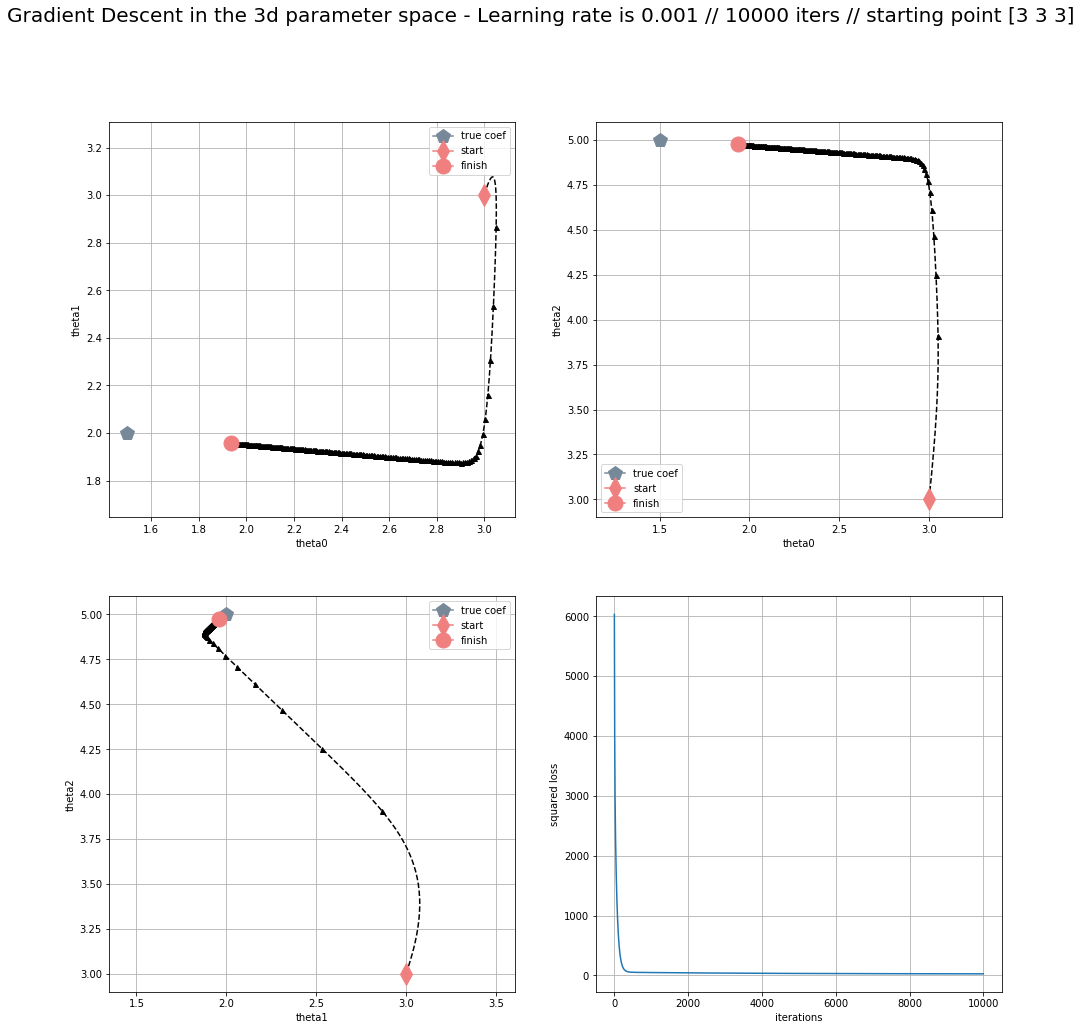

In [10]:
true_coef=[b, theta_1, theta_2]

def plot_ij(theta_path, i, j, ax):
    ax.plot(true_coef[i], true_coef[j],
           marker='p', markersize=15, label='true coef',
           color='#778899')
    ax.plot(theta_path[:, i],theta_path[:, j],
            color='k', linestyle='--', marker='^', 
            markersize=5, markevery=50)
    ax.plot(theta_path[0, i], theta_path[0, j], marker='d', 
            markersize=15, label='start', color='#F08080')
    ax.plot(theta_path[-1, i], theta_path[-1, j], marker='o', 
            markersize=15, label='finish', color='#F08080')
    ax.set(
        xlabel='theta'+str(i),
        ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')
    
def plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 16))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate, 
                         iters=num_iter, initial=theta_initial)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2, 2, 1)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 2)
    plot_ij(theta_path, 0, 2, ax)
    ax = fig.add_subplot(2, 2, 3)
    plot_ij(theta_path, 1, 2, ax)
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(loss_vec)
    ax.set(xlabel='iterations', ylabel='squared loss')
    ax.grid(True)
    

theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial)

### Stochastic Gradient Descent

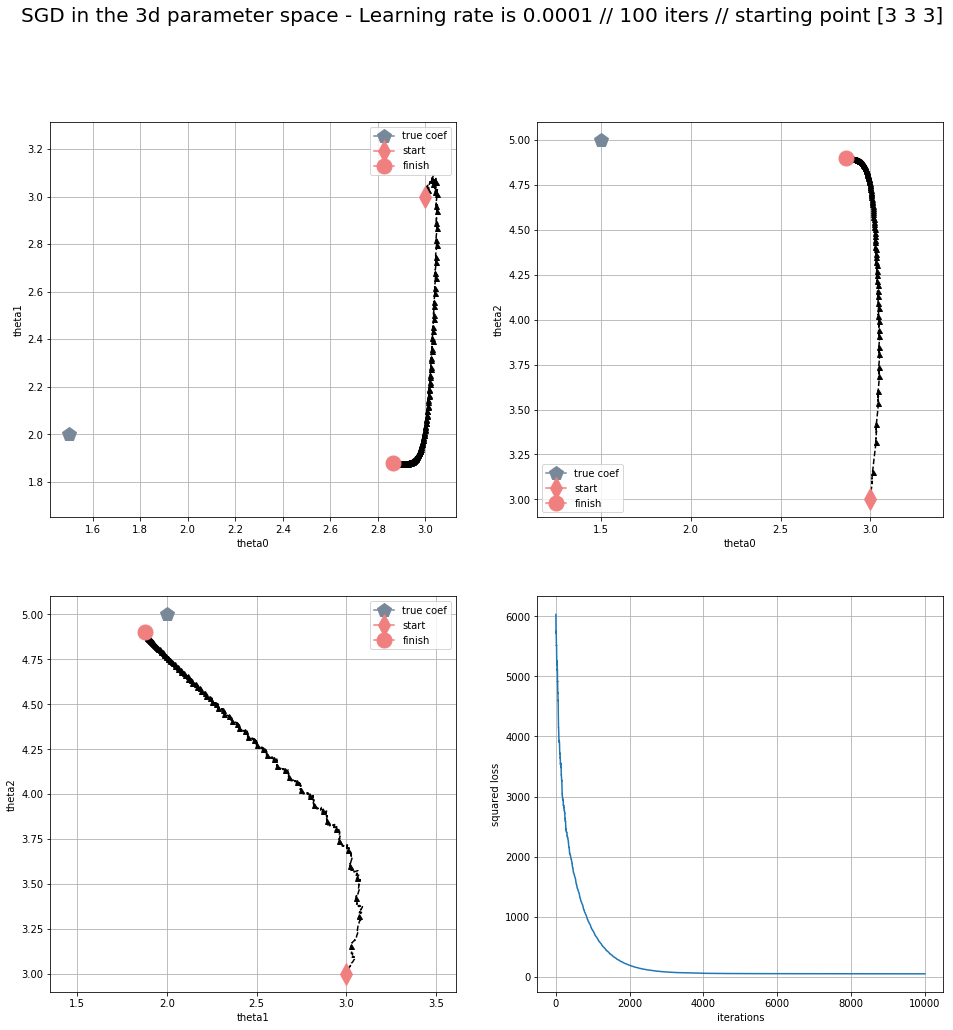

In [13]:
def stochastic_gradient_descent(learning_rate, num_iter, theta_initial):
    
    ## Initialization steps
    theta=theta_initial
    # below are different in stochastic gadient descent
    theta_path=np.zeros(((num_iter*num_obs)+1,3))
    theta_path[0,:]=theta_initial
    loss_vec=np.zeros(num_iter*num_obs)
    
    ## Main SGD loop
    count =0 
    for i in range(num_iter):
        for j in random.randrange(num_obs):
            count+=1
            y_pred=np.dot(theta.T, x_mat.T)
            loss_vec[count-1]=np.sum((y-y_pred)**2)
            grad_vec=(y[j]-y_pred[j])*x_mat[j,:]
            theta = theta +learning_rate*grad_vec
            theta_path[count,:]=theta
    return theta_path, loss_vec

## Parameters to play with
learning_rate=1e-4
num_iter=100
theta_initial=np.array([3,3,3])

theta_path, loss_vec=stochastic_gradient_descent(learning_rate, num_iter, theta_initial)

plot_all(theta_path, loss_vec, learning_rate,
        num_iter, theta_initial, 'SGD')

In [20]:
import random
def stochastic_gradient_descent(learning_rate, num_iter, theta_initial):
    
    ## Initialization steps
    theta=theta_initial
    # below are different in stochastic gadient descent
    theta_path=np.zeros(((num_iter*num_obs)+1,3))
    theta_path[0,:]=theta_initial
    loss_vec=np.zeros(num_iter*num_obs)
    
    ## Main SGD loop
    count =0 
    for i in range(num_iter):
        for j in random.sample(range(num_obs), num_obs):
            count+=1
            y_pred=np.dot(theta.T, x_mat.T)
            loss_vec[count-1]=np.sum((y-y_pred)**2)
            grad_vec=(y[j]-y_pred[j])*x_mat[j,:]
            theta = theta +learning_rate*grad_vec
            theta_path[count,:]=theta
    return theta_path, loss_vec

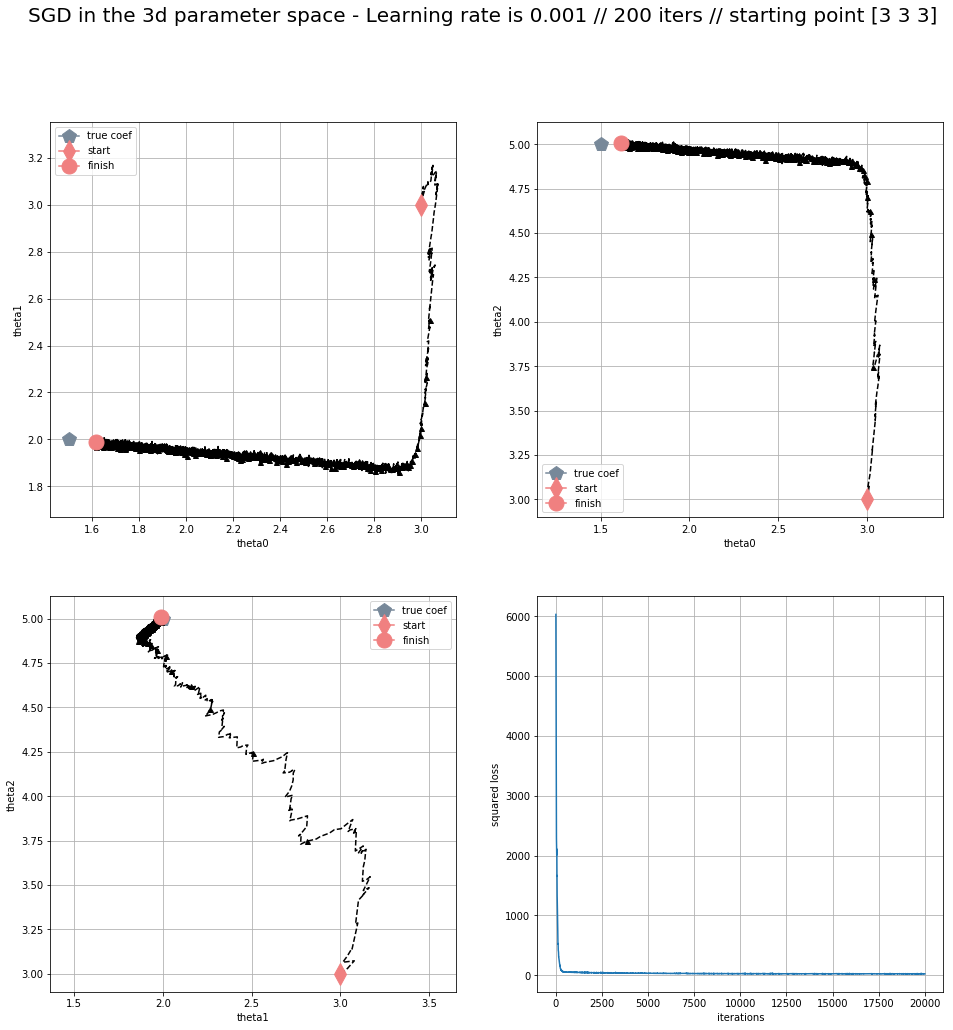

In [23]:
## Parameters to play with
learning_rate=1e-3
num_iter=200
theta_initial=np.array([3,3,3])

theta_path, loss_vec=stochastic_gradient_descent(learning_rate, num_iter, theta_initial)

plot_all(theta_path, loss_vec, learning_rate,
        num_iter, theta_initial, 'SGD')

## Intro to Neural network

### Sigmoid function

In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Quickly define sigmoid function
def sigmoid(x):
    return 1/(np.exp(-x)+1)

(-0.5, 1.5)

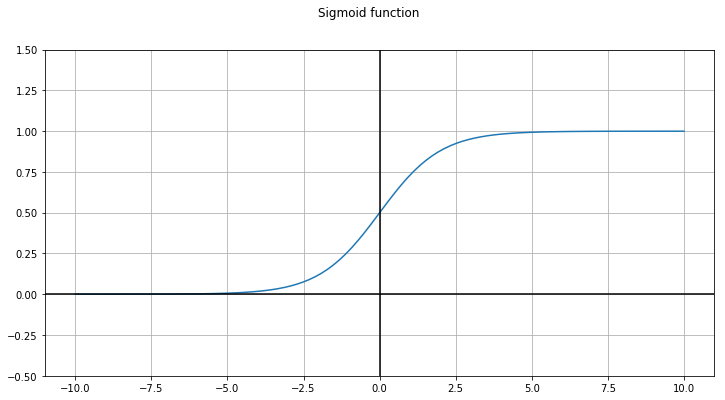

In [27]:
# Plot Sigmoid function
vals=np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig=plt.figure(figsize=(12,6))
fig.suptitle('Sigmoid function')
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0,color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5])

### Neurons as boolean logic gates

#### Or gate

|Input |Ouput|
|------|-----|
| 0  0 |   0 |
| 0  1 |   1 |
| 1  0 |   1 |
| 1  1 |   1 | 

<div>
<img src="data/logic01.png" width="400"/>
</div>

In [28]:
def logic_gate(w1, w2, b):
    return lambda x1,x2:sigmoid(w1*x1+w2*x2+b)

def test(gate):
     for a,b in (0, 0), (0, 1), (1, 0), (1, 1):
            print("{}, {}: {}".format(a,b,np.round(gate(a,b))))

In [29]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


#### And gate

|Input |Ouput|
|------|-----|
| 0  0 |   0 |
| 0  1 |   0 |
| 1  0 |   0 |
| 1  1 |   1 | 

In [31]:
and_gate = logic_gate(20, 20, -30)
test(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


#### NOR(Not Or) gate

|Input |Ouput|
|------|-----|
| 0  0 |   1 |
| 0  1 |   0 |
| 1  0 |   0 |
| 1  1 |   0 | 

In [32]:
nor_gate=logic_gate(-20, -20, 10)
test(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


#### NAND(Not and) gate

|Input |Ouput|
|------|-----|
| 0  0 |   1 |
| 0  1 |   1 |
| 1  0 |   1 |
| 1  1 |   0 | 

In [33]:
nand_gate=logic_gate(-20, -20, 30)
test(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


### The limits of single neuron

#### XOR(Exclusive Or) gate

|Input |Ouput|
|------|-----|
| 0  0 |   0 |
| 0  1 |   1 |
| 1  0 |   1 |
| 1  1 |   0 | 

In [43]:
# Make sure we have or_gate, nand_gate, and and_gate working from above
def xor_gate(a,b):
    c=or_gate(a,b)
    d=nand_gate(a,b)
    return and_gate(c,d)

test(xor_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


### Feedforward Networks as Matrix computations

In [70]:
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])
x_in = np.array([.5,.8,.2])
x_mat_in = np.array([[.5,.8,.2],[.1,.9,.6],[.2,.2,.3],
                     [.6,.1,.9],[.5,.5,.4],[.9,.1,.9],[.1,.8,.7]])

def soft_max_vec(vec):
    return np.exp(vec)/np.sum(np.exp(vec))

def soft_max_mat(mat):
    return np.exp(mat)/np.sum(np.exp(mat),axis=1)[:, np.newaxis]

print('the matrix W_1\n')
print(W_1)
print('-'*30)
print('vector input x_in\n')
print(x_in)
print ('-'*30)
print('matrix input x_mat_in -- starts with the vector `x_in`\n')
print(x_mat_in)

the matrix W_1

[[ 2 -1  1  4]
 [-1  2 -3  1]
 [ 3 -2 -1  5]]
------------------------------
vector input x_in

[0.5 0.8 0.2]
------------------------------
matrix input x_mat_in -- starts with the vector `x_in`

[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]


In [61]:
## Begin solution
z_2=np.dot(x_in, W_1)
z_2

array([ 0.8,  0.7, -2.1,  3.8])

In [62]:
a_2=sigmoid(z_2)
a_2

array([0.68997448, 0.66818777, 0.10909682, 0.97811873])

In [63]:
z_3=np.dot(a_2, W_2)
z_3

array([ 3.55880727,  4.01355384,  0.48455118, -1.55014198])

In [64]:
a_3=sigmoid(z_3)
a_3

array([0.97231549, 0.98225163, 0.61882199, 0.17506576])

In [65]:
z_4=np.dot(a_3, W_3)
z_4

array([ 2.04146788,  1.04718238, -3.47867612])

In [66]:
y_out=soft_max_vec(z_4)
y_out

array([0.72780576, 0.26927918, 0.00291506])

In [81]:
## A one-line function to do the entire neural net computation

def nn_comp_vec(x):
    return soft_max_vec(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

def nn_comp_mat(x):
    return soft_max_mat(sigmoid(sigmoid(np.dot(x,W_1)).dot(W_2)).dot(W_3))

In [85]:
## try reduce function
from functools import reduce 
def nn_comp_mat2(x):
    z=reduce(lambda x,y: sigmoid(np.dot(x,y)),(x,W_1, W_2, W_3))
    return soft_max_mat(z)
   

In [77]:
nn_comp_vec(x_in)

array([0.72780576, 0.26927918, 0.00291506])

In [83]:
nn_comp_mat(x_mat_in)

array([[0.72780576, 0.26927918, 0.00291506],
       [0.62054212, 0.37682531, 0.00263257],
       [0.69267581, 0.30361576, 0.00370844],
       [0.36618794, 0.63016955, 0.00364252],
       [0.57199769, 0.4251982 , 0.00280411],
       [0.38373781, 0.61163804, 0.00462415],
       [0.52510443, 0.4725011 , 0.00239447]])

In [86]:
nn_comp_mat2(x_mat_in)

array([[0.43661088, 0.37773511, 0.18565401],
       [0.42273475, 0.39552897, 0.18173627],
       [0.43126309, 0.38249038, 0.18624653],
       [0.39712538, 0.42230468, 0.18056993],
       [0.41729399, 0.40143126, 0.18127475],
       [0.39712079, 0.41993225, 0.18294695],
       [0.41307274, 0.40776163, 0.17916563]])

## Backpropagation

In [ ]:
import tnumpy as np
import matplotlib.pyplot as plt

 We will take the following steps:

    Initialize the weights to random values between -1 and 1
    Perform the feed-forward computation
    Compute the loss function
    Calculate the gradients for all the weights via back-propagation
    Update the weight matrices (using a learning_rate parameter)
    Execute steps 2-5 for a fixed number of iterations
    Plot the accuracies and log loss and observe how they change over time


In [91]:
num_obs=500
x_mat_1=np.random.uniform(-1,1, size=(num_obs,2))
x_mat_bias=np.ones((num_obs, 1))
x_mat_full=np.concatenate((x_mat_1, x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

shape of x_mat_full is (500, 3)
shape of y is (500,)


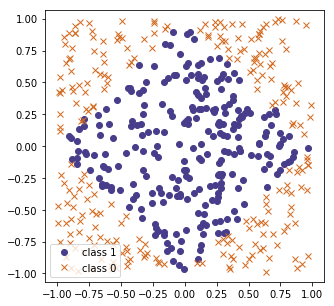

In [92]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [93]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def loss_fn(y_true, y_pred, eps=1e-16):
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

def forward_pass(W1, W2):
    global x_mat
    global y
    global num_
    
    z_2=np.dot(x_mat, W1)
    a_2=sigmoid(z_2)
    z_3=np.dot(a_2, W2)
    y_pred=sigmoid(z_3).reshape((len(x_mat),))
    
    J_z_3_grad=-y+y_pred
    J_W_2_grad=np.dot(J_z_3_grad,a_2)
    a_2_z_2_grad=sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad=(np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

iteration 0, log loss is 0.8214, accuracy is 0.49
iteration 200, log loss is 0.6861, accuracy is 0.588
iteration 400, log loss is 0.6741, accuracy is 0.58
iteration 600, log loss is 0.6373, accuracy is 0.678
iteration 800, log loss is 0.5778, accuracy is 0.728
iteration 1000, log loss is 0.5465, accuracy is 0.732
iteration 1200, log loss is 0.5342, accuracy is 0.74
iteration 1400, log loss is 0.5089, accuracy is 0.756
iteration 1600, log loss is 0.4357, accuracy is 0.794
iteration 1800, log loss is 0.3665, accuracy is 0.866
iteration 2000, log loss is 0.3266, accuracy is 0.878
iteration 2200, log loss is 0.2983, accuracy is 0.896
iteration 2400, log loss is 0.2705, accuracy is 0.912
iteration 2600, log loss is 0.2453, accuracy is 0.916
iteration 2800, log loss is 0.2253, accuracy is 0.932
iteration 3000, log loss is 0.2103, accuracy is 0.938
iteration 3200, log loss is 0.1990, accuracy is 0.95
iteration 3400, log loss is 0.1903, accuracy is 0.952
iteration 3600, log loss is 0.1834, acc

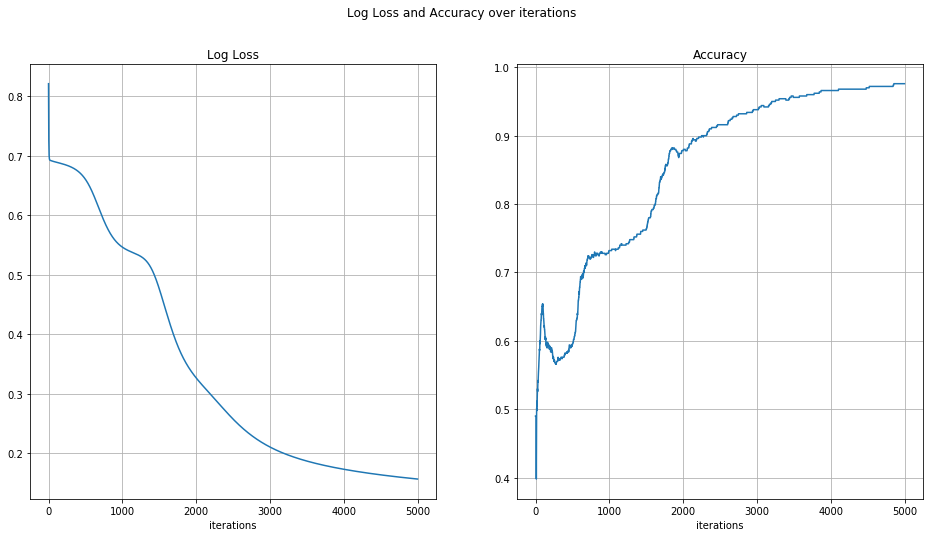

In [94]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4))
W_2 = np.random.uniform(-1,1,size=(4))
num_iter = 5000
learning_rate = .001
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad 
    W_2 = W_2 - learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy
    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    ## Print the loss and accuracy for every 200th iteration
    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)

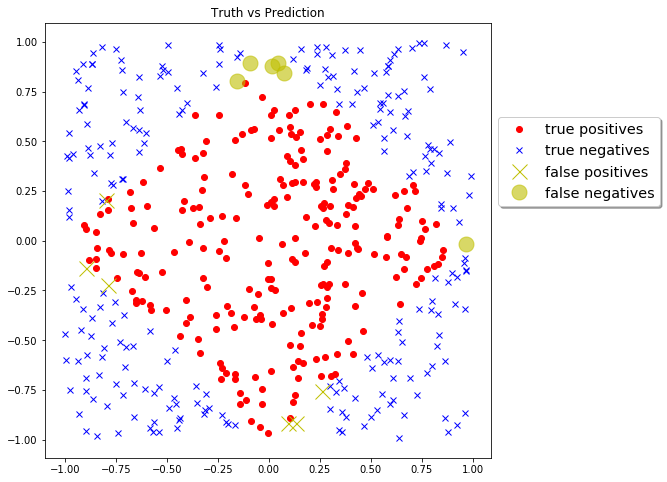

In [95]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');